# RNN デモ

In [18]:
# -*- coding: utf-8 -*-
# Tensorflow 2.x

import pandas as pd
import numpy as np
import math
import random


<AxesSubplot:>

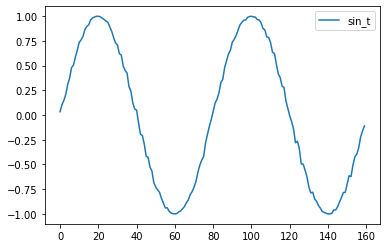

In [19]:
%matplotlib inline
random.seed(0)
# 乱数の係数
random_factor = 0.05
# サイクルあたりのステップ数
steps_per_cycle = 80
# 生成するサイクル数
number_of_cycles = 50

df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
df[["sin_t"]].head(steps_per_cycle * 2).plot()

## モデル作成

In [20]:
def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev])
        docY.append(data.iloc[i+n_prev])
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1, n_prev = 100):  
    """
    df should be np.array()
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))
    ntrn = int(ntrn)
    x_train, y_train = _load_data(df.iloc[0:ntrn], n_prev)
    x_test, y_test = _load_data(df.iloc[ntrn:], n_prev)

    return (x_train, y_train), (x_test, y_test)

In [25]:
length_of_sequences = 100
tmpdf = pd.DataFrame(df)
(x_train, y_train), (x_test, y_test) = train_test_split(tmpdf, n_prev =length_of_sequences)

print("train=")
print(x_train)
print("test=")
print(x_test)

train=
[[[ 0.00000000e+00  3.44353760e-02]
  [ 1.00000000e+00  1.04146063e-01]
  [ 2.00000000e+00  1.48584561e-01]
  ...
  [ 4.70000000e+01 -5.28242851e-01]
  [ 4.80000000e+01 -5.66440464e-01]
  [ 4.90000000e+01 -6.84277439e-01]]

 [[ 1.00000000e+00  1.04146063e-01]
  [ 2.00000000e+00  1.48584561e-01]
  [ 3.00000000e+00  2.09937587e-01]
  ...
  [ 4.80000000e+01 -5.66440464e-01]
  [ 4.90000000e+01 -6.84277439e-01]
  [ 5.00000000e+01 -7.28216569e-01]]

 [[ 2.00000000e+00  1.48584561e-01]
  [ 3.00000000e+00  2.09937587e-01]
  [ 4.00000000e+00  3.10089087e-01]
  ...
  [ 4.90000000e+01 -6.84277439e-01]
  [ 5.00000000e+01 -7.28216569e-01]
  [ 5.10000000e+01 -7.57016582e-01]]

 ...

 [[ 3.54800000e+03  8.20962668e-01]
  [ 3.54900000e+03  7.27295360e-01]
  [ 3.55000000e+03  6.93032043e-01]
  ...
  [ 3.59500000e+03 -3.37301107e-01]
  [ 3.59600000e+03 -3.12478690e-01]
  [ 3.59700000e+03 -2.21039817e-01]]

 [[ 3.54900000e+03  7.27295360e-01]
  [ 3.55000000e+03  6.93032043e-01]
  [ 3.55100000e+03 

## 学習

In [1]:
import tensorflow as tf
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping


ModuleNotFoundError: No module named 'tensorflow'

In [27]:
in_out_neurons = 1
hidden_neurons = 300

model = Sequential()  
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))  
model.add(Dense(in_out_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop")


In [28]:

#model.fit(x_train, y_train, batch_size=600, epochs=15, validation_split=0.05) 
# early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

model.fit(x_train, y_train, batch_size=600, epochs=15, validation_split=0.05, callbacks=[early_stopping]) 

Epoch 1/15


ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/input_spec.py:274 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer sequential_5: expected shape=(None, None, 1), found shape=(None, 50, 2)
